0.00271805622101
0.00266


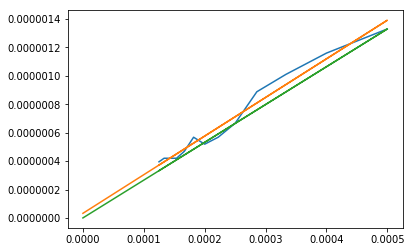

In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt

raw_dir = '.\challenge_raw'
# file = 'rawPlanck_2000.txt'
# file_path = os.path.join(raw_dir,file)

# test_data = np.loadtxt(file_path, skiprows=2, delimiter='\t')
# wv = test_data[:,0]
# B = test_data[:,1]
# plt.plot(wv,B)
# plt.show()


str1 = 'rawPlanck_'
str2 = '.txt'

tmp = np.linspace(2000,8000,13)

maxarr = np.array([])
for T in tmp:
    file_str = ''.join([str1,str(int(T)),str2])
    file_path = os.path.join(raw_dir,file_str)
    
    data = np.loadtxt(file_path,skiprows=2, delimiter='\t')
    wv= data[:,0]
    B = data[:,1]
    # get max value
    maxB = np.max(B)
    # find wv where this occurs
    maxwv = wv[np.where(B == np.max(B))]
    # add to arr
    maxarr = np.append(maxarr, maxwv)

    
invtmp = np.reciprocal(tmp)


m,c = np.polyfit(invtmp,maxarr,1)
print(m)

coarse_m = np.max(maxarr)/np.max(invtmp)

print(coarse_m)

ext_invtmp = np.append([0],invtmp)

line1 = m*ext_invtmp+c
line2 = coarse_m*ext_invtmp

plt.plot(invtmp,maxarr)
plt.plot(ext_invtmp,line1)
plt.plot(ext_invtmp,line2)

plt.show()

##not bad given that true soln is 0.00289